<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gym
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 88.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.3.2 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have num

In [1]:
import numpy as np

class Agent():
  def __init__(self, lr, gamma, n_actions, n_states, eps_start, eps_end, eps_dec):
    self.lr = lr
    self.gamma = gamma
    self.n_actions = n_actions
    self.n_states = n_states
    self.epsilon = eps_start
    self.eps_min = eps_end
    self.eps_dec = eps_dec

    self.Q = {}

    self.init_Q()

  def init_Q(self):
    for state in range(self.n_states):
      for action in range(self.n_actions):
        self.Q[(state, action)] = 0.0

  def choose_action(self, state):
    if np.random.random() < self.epsilon:
      action = np.random.choice([i for i in range(self.n_actions)])
    else:
      actions = np.array([self.Q[(state, a)] \
                          for a in range(self.n_actions)])
      action = np.argmax(actions)

    return action

  def decrement_epsilon(self):
    self.epsilon = self.epsilon * self.eps_dec \
                   if self.epsilon > self.eps_min \
                   else self.eps_min

  def learn(self, state, action, reward, state_):
    actions = np.array([self.Q[state_, a] for a in range(self.n_actions)])

    a_max = np.argmax(actions)

    self.Q[(state, action)] += self.lr * (reward + \
                            self.gamma * self.Q[(state_, a_max)] -
                            self.Q[(state, action)])

    self.decrement_epsilon()


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


episode  0 win pct 0.00 epsilon 1.00
episode  1000 win pct 0.00 epsilon 1.00
episode  2000 win pct 0.00 epsilon 0.99
episode  3000 win pct 0.00 epsilon 0.99
episode  4000 win pct 0.02 epsilon 0.98
episode  5000 win pct 0.01 epsilon 0.98
episode  6000 win pct 0.00 epsilon 0.98
episode  7000 win pct 0.01 epsilon 0.97
episode  8000 win pct 0.04 epsilon 0.97
episode  9000 win pct 0.03 epsilon 0.97
episode  10000 win pct 0.00 epsilon 0.96
episode  11000 win pct 0.01 epsilon 0.96
episode  12000 win pct 0.03 epsilon 0.95
episode  13000 win pct 0.02 epsilon 0.95
episode  14000 win pct 0.00 epsilon 0.95
episode  15000 win pct 0.03 epsilon 0.94
episode  16000 win pct 0.03 epsilon 0.94
episode  17000 win pct 0.02 epsilon 0.94
episode  18000 win pct 0.02 epsilon 0.93
episode  19000 win pct 0.02 epsilon 0.93
episode  20000 win pct 0.00 epsilon 0.92
episode  21000 win pct 0.01 epsilon 0.92
episode  22000 win pct 0.01 epsilon 0.92
episode  23000 win pct 0.02 epsilon 0.91
episode  24000 win pct 0.01 e

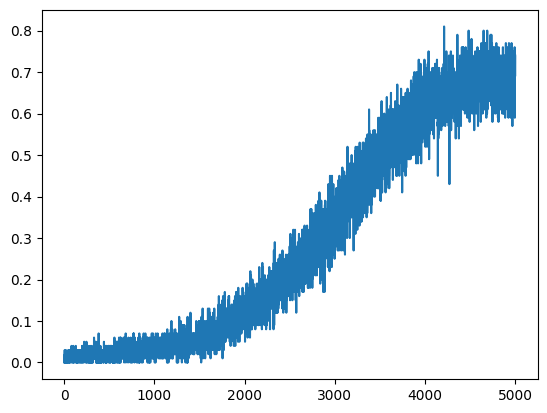

In [2]:
from re import A
import gym
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v1')

agent = Agent(lr=0.001, gamma=0.9, eps_start=1.0, eps_end=0.01, eps_dec=0.9999995, n_actions=4, n_states=16)

scores = []

win_pct_list = []

n_games = 500000

for i in range (n_games):
  done = False
  observation = env.reset()
  score = 0

  while not done:
    action = agent.choose_action(observation)
    observation_, reward, done, info = env.step(action)
    agent.learn(observation, action, reward, observation_)
    observation = observation_
    score += reward
  scores.append(score)

  if i % 100 == 0:
    win_pct = np.mean(scores[-100:])
    win_pct_list.append(win_pct)
    if i % 1000 == 0:
      print('episode ', i, 'win pct %.2f' % win_pct, 'epsilon %.2f' % agent.epsilon)

plt.plot(win_pct_list)
plt.show()